# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman

...

### import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### set defaults

In [2]:
sns.set_context('poster')
sns.set_style('ticks')

### load data

In [3]:
dataset = '../data/feelingOld.csv'

In [4]:
df = pd.read_csv (dataset)

### clean up

In [5]:
clean_df = df.drop('Consent',axis=1)
clean_df.loc[:,'gender'] = [['male', 'female']['fem' in x.lower()] for x in clean_df.loc[:, 'gender']]
clean_df

,ageFeel,oldBegin,oldReally,age,gender,numChild
0,4,55,80,21,female,0
1,5,40,50,39,female,5
2,5,40,70,21,female,0
3,2,40,60,36,female,1
4,5,50,112,46,male,0
5,5,40,60,47,male,2
6,5,30,90,29,female,0
7,1,40,50,35,female,0
8,5,30,50,33,male,0
9,3,50,75,41,male,2


### transform

In [6]:
clean_df.loc[:,'ageBin'] = pd.cut(clean_df.loc[:,'age'],bins=range(0,100,10))

In [7]:
clean_df.loc[:,'oldBeginBin'] = pd.cut(clean_df.loc[:,'oldBegin'],bins=range(0,100,10))

In [8]:
count_df = clean_df.groupby('ageBin').count()
count_df.loc[:,'ageBin'] = count_df.index
count_df

,ageFeel,oldBegin,oldReally,age,gender,numChild,oldBeginBin,ageBin
ageBin,,,,,,,,
"(0, 10]",0,0,0,0,0,0,0,"(0, 10]"
"(10, 20]",2,2,2,2,2,2,2,"(10, 20]"
"(20, 30]",72,72,72,72,72,72,72,"(20, 30]"
"(30, 40]",61,61,61,61,61,61,61,"(30, 40]"
"(40, 50]",29,29,29,29,29,29,29,"(40, 50]"
"(50, 60]",22,22,22,22,22,22,22,"(50, 60]"
"(60, 70]",6,6,6,6,6,6,6,"(60, 70]"
"(70, 80]",3,3,3,3,3,3,3,"(70, 80]"
"(80, 90]",0,0,0,0,0,0,0,"(80, 90]"


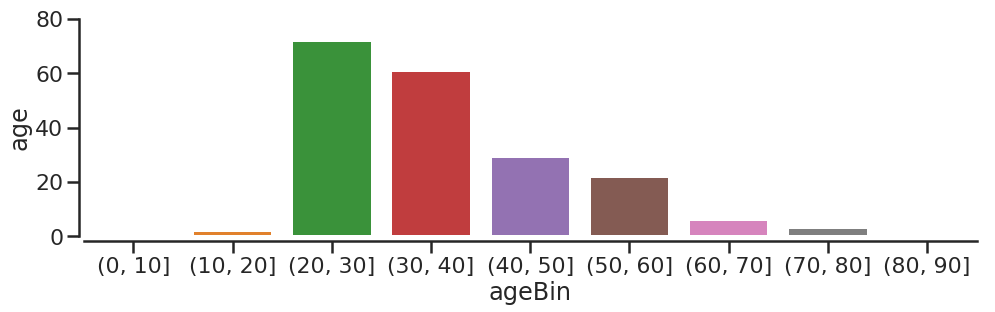

In [9]:
plt.figure(figsize=(16,4))
sns.barplot(data=count_df,x='ageBin',y='age')
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

### explore

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


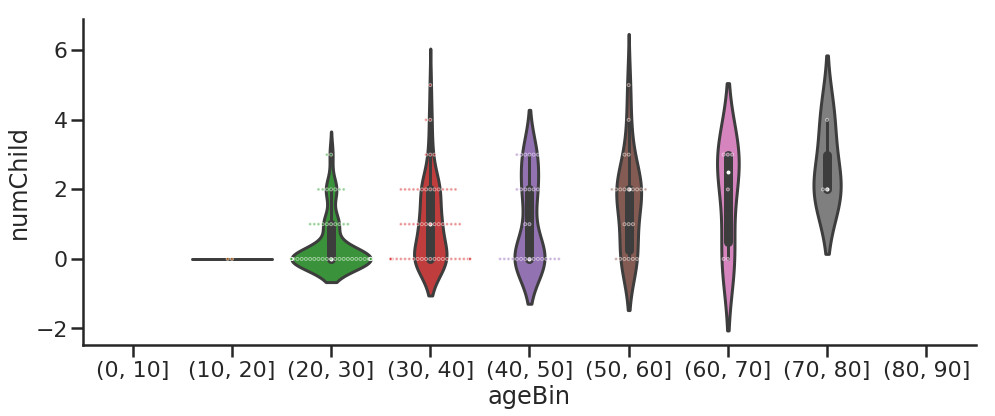

In [14]:
plt.figure(figsize=(16,6))
#sns.barplot(data=clean_df,x='ageBin',y='numChild')
sns.violinplot(data=clean_df,x='ageBin',y='numChild')
#sns.boxplot(data=clean_df,x='ageBin',y='numChild',notch=True)
sns.swarmplot(data=clean_df,x='ageBin',y='numChild',linewidth=1,edgecolor='white',alpha=0.5,size=3)
sns.despine()
plt.show()